# Logistical Regression

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
# Load the Dataset

raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


The variables are <b>interest_rate</b> (3-month interst rate between banks) and <b>duration</b> (time period since last contact with consumer). The <b>previous</b> column indicates success of the last marketing campaign with a given customer. The <b>march</b> and <b>may</b> columns are Booleans indicating when the call was made to the customer and <b>credit</b> shows if the customer has enough credit to avoid defaulting.   

In [4]:
#First, we map the outcomes to booleans to assess success of bark marketing strategy
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis=1) #drop predetermined index
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [5]:
data.describe() # Get data metrics for easier analysis

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


In [6]:
#Declare independent and dependent variables
y = data['y']
x1 = data['duration']

In [9]:
#Simple logistic regression
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:                  0.2121
Time:                        14:57:32   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

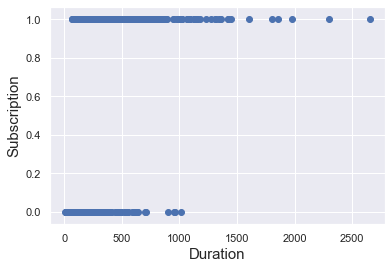

In [11]:
#Scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Subscription', fontsize=15)
plt.show()

#### Adding more variables

We can expand the model by adding more relavant variables and using a multivariate logistic regression. We add 'interest_rate', 'credit', 'march' and 'previous'. 

In [13]:
estimators = ['interest_rate', 'credit', 'march', 'previous', 'duration']

x1_multi = data[estimators]
y = data['y']

In [14]:
x_multi = sm.add_constant(x1_multi)
reg_logit = sm.Logit(y,x_multi)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-07-01 15:05 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

In [18]:
# We define a function to find Confusion matrix to estimate accuracy

def confusion_matrix(data,actual_values,model):
    
    # confusion matrix
    
    # Parameters
    # ----------
        # data: data frame or array, formatted the same as the dataset
    
        # actual_values: data frame or array, actual values from test data
    
        # model: A logitResults object
    # ----------
    
    pred_values = model.predict(data) 
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [19]:
confusion_matrix(x_multi,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

#### Test the model

In [20]:
# We load and modify new test data for model
raw_data2 = pd.read_csv('Bank-data-testing.csv')
test_data = raw_data2.copy()
test_data = test_data.drop(['Unnamed: 0'], axis=1)

test_data['y'] = test_data['y'].map({'yes':1, 'no':0})
test_data

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [21]:
# Declare dependent and independent variables
test_y = test_data['y']
test_x1 = test_data[estimators]
test_x = sm.add_constant(test_x1)

In [22]:
# Test confusion matrix and test accuracy
confusion_matrix(test_x, test_y, results_logit)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [23]:
# Compare with previous confusion matrix
confusion_matrix(x_multi, y, results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

Here, test accuracy is slightly lower than train accuracy. In general, we always expect the test accuracy to be lower.